# Theis Type Curve & Data sheets
This notebook is intended to draw the necessary plots for graphical pumping test evaluation methods. Plots will be saved in a subfolder. Size and appearance of the plots can be adapted.

## Introduction

### General situation
We consider a confined aquifer with constant transmissivity. If a well is pumping water out of the aquifer, radial flow towards the well is induced. The hydraulics are described by the following simplified flow equation. This equation accounts for 1D radial transient flow towards a fully penetrating well within a confined aquifer without further sinks and sources:

$$ \frac{\partial^2 h}{\partial r^2}+\frac{1}{r}\frac{\partial h}{\partial r}=\frac{S}{T}\frac{\partial h}{\partial t} $$

### Solution by Theis
Charles V. Theis presented a solution for this by deriving

$$ s(r,t)=\frac{Q}{4\pi T}W(u) $$

with the well function

$$ W(u) = \int_{u }^{+\infty} \frac{e^{-\tilde u}}{\tilde u}d\tilde u $$

and the dimensionless variable 

$$ u = \frac{Sr^2}{4Tt} $$

This equations are not easy to solve. Historically, values for the well function were provided by tables or as so called type-curve. The type-curve matching with experimental data for pumping test analysis can be considered as one of the basic hydrogeological methods.

However, modern computer provide an easier and more convinient way to solve the 1D radial flow equation based on the Theis approach.

### Computation

Subsequently, the computation is done by general mathematical routines. It is not necessary to understand all details (although the code reveals them). But the application of those methods for pumping test data is of great practical importance.

- Subsequently, parts that are not essential for understanding are marked with *(italic text in brackets)*. You need to run those cells but you don't necessarily need read the code.

- Necessary parts come in **bold text**.

*(First, the necessary Python functions are initiated.)*

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import os

save_dir = ('C:/SYMPLE_THEIS_CURVEVARNUM/')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

**The following section stores the measured data.**

This are two lists with time (in minutes) and drawdown (in meters). Make sure that those elements match each other (e.g. the first time is associated with the first drawdown value etc.). Here, the data from Fetter are used whereas here drawdown is given in meters (1 feet = 0.3048m).

Currently, two data sets are provided (_hint: you can 'deactivate' data by commenting them out by using the **#**-symbol_)

In [18]:
# DATA VARNUM 2016 (Q = 1138 m3/day)

#R4
m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
m_ddown = [2E-05,0.0303,0.05141,0.0661,0.07509,0.08408,0.09307,0.10115,0.10556,0.10997,0.11162,0.11878,0.12319,0.12577,0.13002,0.13245,0.13396,0.13822,0.14064,0.14307,0.14457,0.147,0.14851,0.14818,0.15108,0.15307,0.15322,0.15612,0.15902,0.161,0.16115,0.16313,0.16328,0.16343,0.16618,0.16618,0.16618,0.16893,0.16893,0.17077,0.17352,0.17077,0.17352,0.17352,0.17614,0.17602,0.17589,0.1776,0.17564,0.17552,0.17722,0.17527,0.17514,0.17685,0.1768,0.1795,0.17945,0.1794,0.18118,0.18113,0.18108,0.18103,0.18098,0.1791,0.17897,0.18068,0.18056,0.18227,0.18214,0.18202,0.18189,0.18177,0.17981,0.18152,0.18179,0.18207,0.18509,0.18262,0.18564,0.18592,0.18344,0.18647,0.18399,0.18427,0.18773,0.18662,0.18733,0.18622,0.18602,0.18673,0.18837,0.18633,0.18613,0.18777,0.18779,0.18782,0.18784,0.18787,0.18789,0.18792,0.18794,0.18797,0.18799,0.18802,0.19092,0.19107,0.19122,0.19137,0.19152,0.19167,0.19182,0.19197,0.19395,0.19227,0.19244,0.19262,0.19279,0.19297,0.19314,0.19332,0.19349,0.19367,0.19384,0.19402,0.19552,0.1952,0.19304,0.19455,0.19422,0.19207,0.19357,0.19325,0.19109,0.1926,0.19257,0.19255,0.19252,0.1925,0.19247,0.19245,0.19242,0.1924,0.19237,0.19235,0.19252,0.1927,0.19562,0.19305,0.19322,0.1934,0.19632,0.1965,0.19392,0.19685,0.19405,0.194,0.19395,0.19665,0.1966,0.19655,0.1965,0.19828,0.1964,0.19635,0.19635,0.19635,0.19818,0.19818,0.19635,0.19818,0.19635,0.19818,0.19818,0.19635,0.19801,0.19783,0.19766,0.19748,0.19731,0.19713,0.19971,0.19953,0.19936,0.19827,0.19661,0.19862,0.19879,0.19897,0.19731,0.19932,0.20041,0.19783,0.19801,0.20002,0.20063,0.19942,0.20003,0.19973,0.19668,0.20188,0.19792,0.19853,0.19823,0.19702,0.19793,0.19793,0.19977,0.19702,0.19793,0.19793,0.19702,0.19518,0.19793,0.19977,0.19808,0.20007,0.19747,0.20037,0.20052,0.19792,0.19898,0.19913,0.19928,0.19943,0.19938,0.19842,0.19837,0.19923,0.19827,0.19913,0.20183,0.19812,0.19898,0.19893,0.19804,0.19807,0.19901,0.19628,0.20181,0.19817,0.20094,0.20097,0.20191,0.20193,0.19953,0.19988,0.19932,0.20242,0.20002,0.20312,0.20072,0.20198,0.20417,0.20543,0.20142,0.20198,0.20347,0.20312,0.20002,0.20242,0.19932,0.19897,0.20137,0.20193,0.20122,0.19867,0.19887,0.19907,0.20293,0.20222,0.19967,0.20262,0.20007,0.20027,0.20376,0.20358,0.20249,0.20232,0.19939,0.20197,0.20179,0.20162,0.20144,0.20402,0.20233,0.20248,0.20263,0.20187,0.20293,0.20033,0.20232,0.20247,0.20262,0.20277,0.20294,0.20312,0.20329,0.20347,0.20364,0.20473,0.20399,0.20417,0.20434,0.20452,0.20159,0.20417,0.20399,0.20382,0.20364,0.2053,0.20512,0.20312,0.20477,0.20277,0.20477,0.20312,0.20329,0.20347,0.20547,0.20382,0.20399,0.20417,0.20617,0.20452,0.20417] # drawdown in meters


#R12
#m_time =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [2E-05,0.02022,0.04591,0.0716,0.09342,0.11433,0.12882,0.14332,0.15139,0.16313,0.17396,0.18203,0.18827,0.1936,0.19878,0.2012,0.20729,0.21247,0.21489,0.22007,0.22249,0.22583,0.22826,0.23068,0.23358,0.23648,0.23938,0.24228,0.24243,0.24533,0.24915,0.2493,0.2522,0.25235,0.2551,0.2551,0.25785,0.25785,0.2606,0.2606,0.26335,0.26335,0.2661,0.2661,0.26597,0.26585,0.26847,0.2656,0.26822,0.27177,0.26797,0.27152,0.27139,0.27402,0.27397,0.27392,0.27387,0.27382,0.27652,0.27647,0.27642,0.27637,0.27907,0.27627,0.27614,0.27877,0.27589,0.27577,0.27839,0.27735,0.27814,0.2771,0.28064,0.2796,0.27712,0.2774,0.28042,0.27795,0.27822,0.2785,0.28152,0.27905,0.28207,0.28235,0.28307,0.28012,0.28175,0.2843,0.2841,0.28482,0.28462,0.28442,0.28422,0.28402,0.28404,0.28407,0.28684,0.28412,0.28689,0.28692,0.28694,0.28422,0.28699,0.28702,0.28717,0.28732,0.28747,0.28762,0.28777,0.28792,0.28807,0.28822,0.28837,0.28852,0.29144,0.28887,0.29179,0.28922,0.28939,0.28957,0.28974,0.28992,0.29009,0.29027,0.28994,0.29237,0.28929,0.29172,0.29139,0.29107,0.29074,0.29042,0.29009,0.28977,0.28974,0.28972,0.28969,0.29333,0.28964,0.28687,0.28959,0.29323,0.28954,0.28952,0.29336,0.29353,0.29371,0.29022,0.29406,0.29423,0.29441,0.29458,0.29109,0.29493,0.29488,0.29483,0.29478,0.29473,0.29468,0.29463,0.29458,0.29453,0.29723,0.29718,0.29443,0.29443,0.29443,0.29443,0.29443,0.29718,0.29443,0.29443,0.29443,0.29718,0.29701,0.29683,0.29666,0.29648,0.29631,0.29613,0.29596,0.29578,0.29561,0.29543,0.29561,0.29853,0.29596,0.29613,0.29631,0.29648,0.29666,0.29683,0.29701,0.29993,0.29688,0.29658,0.29628,0.29598,0.29568,0.29538,0.29508,0.29478,0.29723,0.29693,0.29418,0.29418,0.29418,0.29418,0.29693,0.29693,0.29418,0.29418,0.29693,0.29418,0.29433,0.29723,0.29738,0.29478,0.29768,0.29783,0.29798,0.29813,0.29828,0.29843,0.29838,0.29833,0.29828,0.29823,0.29818,0.29813,0.29808,0.29803,0.29798,0.29793,0.29796,0.29798,0.29801,0.29803,0.30081,0.30083,0.29811,0.29813,0.29816,0.30093,0.29853,0.29888,0.29923,0.29958,0.29993,0.30303,0.30338,0.30098,0.30133,0.30168,0.30408,0.30098,0.30063,0.30303,0.29993,0.30233,0.29923,0.29888,0.29853,0.29818,0.30113,0.30133,0.29878,0.29898,0.30193,0.30213,0.30233,0.30253,0.30273,0.30018,0.30001,0.30258,0.30241,0.29948,0.29931,0.29913,0.30171,0.29878,0.29861,0.29843,0.30133,0.29873,0.29888,0.29903,0.29918,0.29933,0.29948,0.29963,0.30253,0.29993,0.30011,0.30028,0.30046,0.30063,0.30081,0.30373,0.30391,0.30133,0.30151,0.30443,0.30151,0.30133,0.30116,0.30098,0.30081,0.30338,0.30046,0.30028,0.30286,0.29993,0.30286,0.30303,0.30321,0.30338,0.30356,0.30373,0.30391,0.30408,0.30426,0.30443,0.30408] # drawdown in meters

#R14
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [0.000,0.00739,0.01474,0.02577,0.03568,0.04284,0.04999,0.05349,0.05973,0.06322,0.06671,0.07387,0.07736,0.08085,0.0842,0.08387,0.08629,0.08964,0.09298,0.09265,0.096,0.09934,0.09901,0.09869,0.1025,0.10632,0.10647,0.11029,0.11044,0.11059,0.1144,0.11455,0.1147,0.11485,0.1176,0.1176,0.1176,0.12127,0.12127,0.12127,0.12127,0.12127,0.12494,0.12494,0.12481,0.12469,0.12456,0.1281,0.12431,0.12419,0.12773,0.12394,0.12748,0.12369,0.1273,0.12725,0.1272,0.12715,0.1271,0.12705,0.13067,0.12695,0.13057,0.13052,0.1304,0.13027,0.13015,0.13002,0.1299,0.12977,0.13331,0.13319,0.1294,0.12927,0.12955,0.13349,0.13376,0.13404,0.13064,0.13092,0.13486,0.13514,0.13541,0.13569,0.13549,0.13529,0.13509,0.13489,0.13469,0.13449,0.13429,0.13409,0.13389,0.13369,0.13371,0.1374,0.13743,0.13379,0.13748,0.1375,0.13753,0.13755,0.13758,0.1376,0.13775,0.1379,0.13805,0.1382,0.13835,0.1385,0.14232,0.13514,0.13895,0.1391,0.13928,0.13945,0.13963,0.1398,0.13998,0.14015,0.14033,0.1405,0.14068,0.14085,0.14053,0.1402,0.14354,0.14322,0.14289,0.1389,0.13858,0.14192,0.14159,0.14127,0.14124,0.14122,0.14119,0.14117,0.14114,0.13745,0.13743,0.14107,0.14104,0.14102,0.1412,0.14137,0.14154,0.14172,0.13823,0.14207,0.14225,0.14242,0.13893,0.14277,0.14272,0.14267,0.14262,0.14257,0.13885,0.1388,0.14242,0.14237,0.13865,0.1386,0.1386,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14502,0.14209,0.14467,0.14174,0.14157,0.1414,0.14122,0.14379,0.14087,0.14069,0.14052,0.14069,0.14087,0.14104,0.14122,0.14139,0.14157,0.14449,0.14192,0.14484,0.14227,0.14472,0.14167,0.14137,0.14382,0.14352,0.14322,0.14292,0.14262,0.14232,0.13927,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14217,0.14232,0.14247,0.14262,0.14277,0.14292,0.14307,0.14322,0.14337,0.14352,0.14347,0.14342,0.14337,0.14332,0.14327,0.14322,0.14317,0.14679,0.14307,0.14302,0.14304,0.14307,0.14309,0.14312,0.14314,0.14317,0.14319,0.14322,0.14324,0.14327,0.14362,0.14397,0.14432,0.14467,0.14502,0.14537,0.14939,0.14607,0.14642,0.14677,0.14642,0.14607,0.14572,0.14537,0.14502,0.14467,0.14432,0.14397,0.14362,0.14694,0.14347,0.14367,0.14387,0.14407,0.14427,0.14447,0.14467,0.14487,0.14507,0.14894,0.1451,0.14492,0.14474,0.14457,0.14439,0.14789,0.14405,0.14387,0.14369,0.14352,0.14367,0.14382,0.14397,0.14779,0.14427,0.14442,0.14457,0.14472,0.14487,0.14502,0.14886,0.14537,0.14555,0.14572,0.14956,0.14974,0.14625,0.15009,0.15026,0.15044,0.15026,0.15009,0.14625,0.14607,0.14589,0.14572,0.14554,0.14904,0.14886,0.14502,0.1452,0.14537,0.14921,0.14572,0.1459,0.14607,0.14625,0.14642,0.14659,0.14677,0.14642]   # drawdown in meters

#R15
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [0.04219,0.20264,0.24483,0.26044,0.28501,0.29492,0.30849,0.31657,0.32556,0.33272,0.33988,0.34612,0.35236,0.35769,0.36103,0.36345,0.36588,0.3683,0.37439,0.37407,0.37558,0.38075,0.38409,0.3856,0.38667,0.38957,0.3943,0.39354,0.39644,0.403,0.40315,0.40147,0.40345,0.4036,0.40635,0.4091,0.40635,0.4091,0.4091,0.4091,0.41277,0.41277,0.41277,0.41552,0.41264,0.41527,0.41514,0.41502,0.41764,0.41752,0.41739,0.42094,0.41623,0.41702,0.42064,0.42059,0.42054,0.42324,0.42319,0.4213,0.42309,0.42487,0.42574,0.42294,0.42556,0.42544,0.42531,0.42519,0.42415,0.42677,0.42848,0.42652,0.42823,0.43085,0.43113,0.42865,0.42893,0.4292,0.43223,0.42975,0.43094,0.42847,0.43058,0.43085,0.43157,0.43137,0.433,0.4328,0.43077,0.4324,0.42945,0.432,0.43364,0.43344,0.43438,0.4344,0.43443,0.43445,0.43448,0.43359,0.43361,0.43455,0.43824,0.4346,0.43475,0.43215,0.4323,0.43245,0.43535,0.4355,0.43565,0.43947,0.43595,0.43519,0.43811,0.43829,0.43846,0.43864,0.43881,0.43899,0.43916,0.43934,0.43951,0.43785,0.44119,0.43904,0.43871,0.44114,0.43806,0.44049,0.43741,0.43984,0.43951,0.43919,0.43916,0.43914,0.43911,0.43909,0.43906,0.43904,0.43901,0.43624,0.44263,0.4426,0.44278,0.43929,0.44313,0.4433,0.44348,0.43999,0.44016,0.444,0.44418,0.44069,0.44064,0.44425,0.44237,0.44232,0.43952,0.44222,0.444,0.44395,0.44665,0.44202,0.44202,0.44202,0.44202,0.44477,0.44202,0.44202,0.44477,0.44385,0.44202,0.44385,0.44368,0.44625,0.44608,0.4459,0.44573,0.4428,0.44538,0.4452,0.44228,0.44485,0.44503,0.4452,0.44538,0.4428,0.44573,0.4459,0.44608,0.44625,0.44918,0.4466,0.4463,0.446,0.4457,0.4454,0.44785,0.4448,0.4445,0.4442,0.4439,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44375,0.4439,0.44405,0.44695,0.44435,0.44175,0.44465,0.4448,0.44495,0.4451,0.4478,0.44775,0.44495,0.4449,0.44485,0.4448,0.44659,0.4447,0.44465,0.4446,0.44463,0.44465,0.44468,0.44287,0.44473,0.44292,0.44294,0.44297,0.44299,0.44302,0.44337,0.44372,0.44407,0.44442,0.44477,0.44512,0.44547,0.44582,0.44617,0.45019,0.44984,0.44582,0.44547,0.44512,0.44477,0.44442,0.44407,0.44372,0.44337,0.44302,0.44322,0.44342,0.44362,0.44107,0.44402,0.44605,0.44625,0.44645,0.44665,0.44685,0.44668,0.4465,0.44908,0.4489,0.44873,0.44855,0.44563,0.44545,0.44528,0.44785,0.44525,0.4454,0.44555,0.4457,0.44585,0.446,0.44432,0.4463,0.44462,0.4466,0.44494,0.44512,0.4453,0.44547,0.44565,0.44582,0.44599,0.44617,0.44635,0.44377,0.44359,0.44617,0.44599,0.44582,0.44564,0.44547,0.44529,0.44237,0.44494,0.44844,0.44494,0.44512,0.44529,0.44547,0.44565,0.44582,0.44599,0.44342,0.44634,0.44377,0.44617] # drawdown in meters

#B1
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [1.06975,0.9955,1.034,1.0505,1.067,1.08075,1.08716,1.0945,1.10916,1.10366,1.11741,1.12016,1.12291,1.13116,1.13391,1.13391,1.14491,1.14216,1.15316,1.13941,1.15041,1.15041,1.15041,1.16141,1.15316,1.16141,1.16141,1.15866,1.16416,1.16966,1.16966,1.16966,1.17791,1.17241,1.17516,1.16966,1.17791,1.18066,1.18341,1.17791,1.17791,1.17516,1.17791,1.18341,1.18066,1.18341,1.17791,1.17791,1.18341,1.18341,1.18891,1.18341,1.18616,1.18066,1.18066,1.17791,1.18066,1.18891,1.18616,1.18066,1.18616,1.19166,1.19716,1.19166,1.19166,1.18616,1.19166,1.19716,1.19716,1.19166,1.19991,1.19441,1.19166,1.18891,1.18341,1.19166,1.18891,1.18891,1.19441,1.19716,1.18616,1.19441,1.19166,1.18891,1.18616,1.19166,1.18891,1.19441,1.19166,1.19441,1.19166,1.19441,1.18891,1.19991,1.19991,1.20266,1.20266,1.20633,1.19716,1.19716,1.19991,1.19991,1.19716,1.20266,1.19716,1.19716,1.19991,1.19716,1.19991,1.20633,1.20633,1.20633,1.20266,1.20908,1.21183,1.20908,1.20633,1.20908,1.20908,1.20633,1.20266,1.20633,1.20266,1.20266,1.20633,1.20908,1.21183,1.20908,1.21183,1.21183,1.20908,1.21183,1.20908,1.21183,1.20908,1.20908,1.20908,1.21458,1.20633,1.20908,1.21183,1.21458,1.21183,1.21458,1.21183,1.21733,1.20908,1.20908,1.21458,1.21458,1.21183,1.20908,1.21183,1.21183,1.21183,1.21458,1.21458,1.21183,1.21733,1.21733,1.21458,1.20908,1.21458,1.21733,1.21733,1.21733,1.21733,1.21733,1.21733,1.21458,1.21183,1.21458,1.21458,1.21183,1.21183,1.21733,1.22008,1.20908,1.21458,1.22008,1.21733,1.22008,1.21733,1.22283,1.22283,1.22283,1.22833,1.22008,1.21183,1.21733,1.22008,1.20908,1.21183,1.22008,1.22008,1.22558,1.22558,1.21458,1.21458,1.21733,1.22008,1.21733,1.20908,1.22008,1.21733,1.21733,1.21183,1.21458,1.21733,1.20908,1.21458,1.21183,1.22008,1.20908,1.22008,1.21458,1.22283,1.21733,1.22283,1.22008,1.21733,1.21733,1.22283,1.21458,1.21733,1.22283,1.21183,1.22008,1.21183,1.21733,1.22283,1.21458,1.21183,1.22008,1.21733,1.22283,1.21733,1.21733,1.22283,1.21458,1.21458,1.22283,1.21733,1.22008,1.21733,1.21733,1.22283,1.21733,1.21458,1.22008,1.21183,1.22008,1.21183,1.22833,1.22558,1.22283,1.21733,1.21733,1.22283,1.22008,1.21458,1.22283,1.22008,1.21733,1.21458,1.21458,1.22283,1.21458,1.22008,1.21458,1.21733,1.21733,1.22558,1.22008,1.22008,1.22558,1.22008,1.22008,1.22008,1.21733,1.21458,1.21458,1.22833,1.21183,1.22558,1.21458,1.21733,1.21458,1.21458,1.21733,1.22008,1.21733,1.21733,1.22008,1.22008,1.21733,1.22283,1.22833,1.22008,1.22283,1.22008,1.22833,1.21733,1.22008,1.22283,1.21733,1.22558,1.22558,1.22283,1.21733,1.22833,1.22008,1.22008,1.22558,1.22008,1.22008,1.22283,1.22283,1.21183,1.22558,1.22833,1.21458,1.22558,1.22283,1.22558] # drawdown in meters

# DATA VARNUM 2018 (Q approx. 11.5 l/s)

#R4
#m_time  = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721]
#m_ddown = [0.039,0.04,0.052,0.058,0.076,0.076,0.076,0.106,0.1,0.1,0.092,0.116,0.105,0.105,0.105,0.117,0.129,0.111,0.136,0.136,0.121,0.139,0.139,0.151,0.145,0.121,0.139,0.152,0.146,0.14,0.149,0.143,0.143,0.143,0.149,0.149,0.143,0.149,0.137,0.143,0.155,0.161,0.15,0.156,0.15,0.151,0.151,0.151,0.163,0.158,0.153,0.164,0.152,0.158,0.14,0.151,0.139,0.139,0.169,0.169,0.167,0.16,0.172,0.159,0.158,0.158,0.157,0.157,0.156,0.155,0.167,0.16,0.178,0.154,0.16,0.16,0.172,0.154,0.166,0.172,0.162,0.162,0.167,0.167,0.161,0.161,0.173,0.167,0.167,0.161,0.181,0.175,0.169,0.169,0.151,0.163,0.169,0.169,0.169,0.157,0.174,0.168,0.174,0.162,0.156,0.186,0.18,0.174,0.175,0.163,0.18,0.18,0.174,0.174,0.174,0.168,0.175,0.169,0.175,0.163,0.161,0.179,0.179,0.173,0.166,0.172,0.16,0.166,0.171,0.171,0.175,0.176,0.182,0.176,0.182,0.177,0.171,0.165,0.172,0.178,0.166,0.166,0.16,0.166,0.166,0.166,0.172,0.166,0.166,0.159,0.162,0.167,0.167,0.161,0.143,0.161,0.161,0.166,0.166,0.154,0.163,0.163,0.163,0.163,0.157,0.164,0.17,0.158,0.176,0.164,0.162,0.168,0.168,0.162,0.174,0.168,0.18,0.174,0.162,0.168,0.157,0.163,0.17,0.17,0.17,0.17,0.171,0.171,0.165,0.177,0.167,0.161,0.161,0.167,0.155,0.167,0.167,0.155,0.149,0.173,0.161,0.173,0.167,0.155,0.166,0.166,0.154,0.16,0.166,0.177,0.163,0.163,0.169,0.169,0.163,0.162,0.144,0.168,0.156,0.168,0.164,0.164,0.158,0.175,0.157,0.163,0.163,0.169,0.169,0.168,0.165,0.171,0.171,0.171,0.165,0.165,0.171,0.171,0.165,0.164,0.166,0.167,0.179,0.179,0.179,0.162,0.168,0.18,0.186,0.175,0.158,0.164,0.164,0.152,0.176,0.164,0.164,0.159,0.171,0.105,0.176,0.175,0.157,0.163,0.097,0.163,0.163,0.163,0.163,0.18,0.171,0.165,0.165,0.159,0.153,0.166,0.172,0.16,0.166,0.172,0.151,0.163,0.163,0.168,0.162,0.156,0.174,0.168,0.168,0.168,0.176,0.158,0.158,0.17,0.175,0.175,0.163,0.169,0.162,0.156,0.155,0.166,0.178,0.165,0.165,0.164,0.164,0.163,0.163,0.156,0.166,0.171,0.165,0.159,0.158,0.17,0.17,0.158,0.169,0.163,0.175,0.157,0.175,0.169,0.163,0.169,0.17,0.176,0.164,0.17,0.186,0.167,0.155,0.167,0.161,0.173,0.167,0.155,0.173,0.173,0.163,0.175,0.181,0.181,0.163,0.164,0.17,0.17,0.176,0.17,0.179,0.167,0.155,0.173,0.167,0.173,0.168,0.162,0.174,0.168,0.166,0.178,0.167,0.161,0.167,0.179,0.162,0.162,0.162,0.162,0.158,0.152,0.164,0.169,0.151,0.163,0.157,0.156,0.162,0.168,0.154,0.172,0.16,0.178,0.178,0.154,0.148,0.153,0.153,0.147,0.174,0.174,0.167,0.149,0.149,0.179,0.155,0.16,0.148,0.16,0.17,0.17,0.164,0.163,0.169,0.157,0.163,0.157,0.163,0.156,0.166,0.158,0.169,0.162,0.173,0.165,0.164,0.145,0.149,0.16,0.167,0.167,0.179,0.18,0.18,0.186,0.174,0.168,0.175,0.187,0.171,0.177,0.183,0.171,0.178,0.172,0.184,0.166,0.172,0.179,0.18,0.18,0.168,0.175,0.175,0.175,0.181,0.175,0.163,0.181,0.173,0.174,0.168,0.174,0.169,0.157,0.181,0.17,0.176,0.183,0.164,0.175,0.157,0.156,0.168,0.173,0.155,0.16,0.172,0.165,0.163,0.169,0.181,0.175,0.182,0.158,0.176,0.176,0.176,0.176,0.168,0.174,0.168,0.168,0.181,0.163,0.181,0.181,0.175,0.163,0.179,0.167,0.166,0.172,0.178,0.16,0.16,0.172,0.154,0.16,0.167,0.167,0.167,0.161,0.167,0.161,0.161,0.161,0.167,0.167,0.166,0.166,0.172,0.171,0.171,0.165,0.165,0.158,0.146,0.176,0.175,0.163,0.175,0.169,0.163,0.175,0.157,0.169,0.169,0.157,0.17,0.17,0.17,0.164,0.158,0.182,0.176,0.182,0.158,0.17,0.164,0.164,0.164,0.164,0.158,0.17,0.158,0.17,0.17,0.176,0.157,0.174,0.168,0.149,0.161,0.166,0.165,0.153,0.164,0.17,0.169,0.187,0.18,0.168,0.18,0.162,0.174,0.185,0.173,0.185,0.177,0.183,0.177,0.171,0.183,0.177,0.184,0.172,0.172,0.184,0.175,0.181,0.175,0.163,0.182,0.17,0.176,0.182,0.176,0.17,0.169,0.175,0.187,0.175,0.181,0.181,0.175,0.175,0.169,0.187,0.168,0.174,0.18,0.174,0.18,0.179,0.173,0.179,0.179,0.173,0.17,0.17,0.175,0.169,0.175,0.157,0.174,0.174,0.156,0.186,0.179,0.173,0.16,0.184,0.184,0.178,0.184,0.19,0.178,0.178,0.173,0.173,0.167,0.179,0.167,0.185,0.179,0.173,0.179,0.173,0.179,0.173,0.173,0.173,0.172,0.166,0.184,0.171,0.171,0.183,0.176,0.182,0.188,0.17,0.188,0.165,0.183,0.171,0.177,0.177,0.187,0.181,0.181,0.187,0.187,0.175,0.175,0.175,0.175,0.181,0.187,0.175,0.181,0.181,0.175,0.175,0.18,0.174,0.18,0.18,0.182,0.182,0.182,0.17,0.17,0.182,0.182,0.183,0.171,0.183,0.182,0.182,0.187,0.175,0.163,0.175,0.175,0.175,0.175,0.175,0.183,0.177,0.177,0.171,0.189,0.171,0.176,0.176,0.194,0.176,0.183,0.183,0.171,0.171,0.177,0.171,0.172,0.178,0.19,0.184,0.183]

#R7
#m_time  = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721]
#m_ddown = [-0.009,-0.009,-0.015,0.009,-0.015,0.004,0.01,-0.008,0.004,-0.008,0.026,-0.004,0.014,0.002,0.02,0.033,0.021,0.027,0.033,0.033,0.03,0.03,0.06,0.043,0.049,0.055,0.049,0.037,0.037,0.049,0.035,0.035,0.053,0.047,0.029,0.041,0.041,0.059,0.065,0.059,0.059,0.059,0.065,0.06,0.066,0.054,0.054,0.055,0.079,0.055,0.062,0.068,0.068,0.049,0.061,0.055,0.055,0.067,0.06,0.078,0.064,0.058,0.057,0.057,0.05,0.079,0.067,0.066,0.078,0.077,0.076,0.052,0.064,0.094,0.088,0.064,0.07,0.069,0.069,0.063,0.089,0.071,0.083,0.065,0.083,0.077,0.059,0.083,0.076,0.088,0.084,0.09,0.09,0.06,0.096,0.072,0.09,0.078,0.061,0.079,0.078,0.102,0.078,0.096,0.072,0.072,0.09,0.084,0.09,0.078,0.072,0.078,0.072,0.096,0.072,0.096,0.096,0.108,0.066,0.072,0.083,0.077,0.088,0.076,0.064,0.094,0.069,0.069,0.081,0.081,0.073,0.067,0.092,0.086,0.08,0.104,0.093,0.093,0.087,0.076,0.052,0.088,0.088,0.094,0.088,0.087,0.081,0.069,0.093,0.099,0.077,0.089,0.071,0.095,0.065,0.076,0.094,0.082,0.082,0.076,0.091,0.091,0.067,0.103,0.073,0.091,0.079,0.097,0.091,0.103,0.096,0.09,0.072,0.09,0.084,0.084,0.09,0.078,0.066,0.101,0.091,0.085,0.085,0.097,0.086,0.104,0.104,0.086,0.087,0.105,0.082,0.076,0.088,0.1,0.064,0.082,0.1,0.076,0.088,0.082,0.083,0.077,0.076,0.064,0.07,0.082,0.076,0.093,0.081,0.063,0.091,0.078,0.084,0.078,0.09,0.084,0.102,0.084,0.078,0.102,0.079,0.097,0.097,0.079,0.067,0.073,0.096,0.078,0.108,0.084,0.075,0.087,0.081,0.075,0.093,0.093,0.068,0.074,0.08,0.098,0.088,0.106,0.089,0.095,0.071,0.089,0.09,0.096,0.102,0.102,0.074,0.08,0.08,0.08,0.098,0.08,0.092,0.092,0.092,0.08,0.079,0.085,0.103,0.079,0.091,0.079,0.096,0.084,0.078,0.078,0.08,0.081,0.093,0.105,0.069,0.093,0.099,0.082,0.082,0.082,0.097,0.09,0.09,0.066,0.078,0.09,0.09,0.054,0.095,0.089,0.098,0.08,0.097,0.085,0.103,0.091,0.084,0.066,0.072,0.09,0.082,0.076,0.099,0.087,0.068,0.092,0.061,0.073,0.09,0.102,0.081,0.081,0.081,0.092,0.092,0.104,0.091,0.079,0.079,0.079,0.084,0.091,0.085,0.073,0.091,0.091,0.091,0.109,0.085,0.091,0.095,0.077,0.065,0.089,0.113,0.083,0.101,0.082,0.094,0.106,0.078,0.085,0.079,0.097,0.073,0.091,0.091,0.086,0.104,0.068,0.083,0.089,0.089,0.101,0.083,0.113,0.083,0.083,0.077,0.095,0.112,0.082,0.076,0.071,0.077,0.101,0.065,0.089,0.084,0.078,0.092,0.085,0.091,0.079,0.091,0.078,0.06,0.072,0.084,0.096,0.088,0.076,0.082,0.088,0.088,0.081,0.087,0.081,0.087,0.081,0.077,0.095,0.095,0.101,0.095,0.064,0.094,0.094,0.076,0.1,0.08,0.091,0.073,0.079,0.079,0.091,0.097,0.084,0.078,0.102,0.099,0.074,0.103,0.083,0.07,0.075,0.08,0.06,0.059,0.07,0.088,0.083,0.107,0.095,0.095,0.084,0.096,0.114,0.096,0.102,0.086,0.08,0.093,0.105,0.063,0.081,0.1,0.088,0.058,0.1,-0.078,0.06,0.09,0.102,0.078,0,0.06,0.085,0.067,0.085,0.059,0.083,0.084,0.078,0.078,0.085,0.097,0.079,0.098,0.08,0.091,0.085,0.09,0.072,0.089,0.077,0.082,0.07,0.063,0.075,0.067,0.091,0.091,0.085,0.085,0.091,0.067,0.085,0.086,0.08,0.078,0.09,0.072,0.078,0.078,0.09,0.078,0.079,0.109,0.067,0.082,0.082,0.076,0.07,0.088,0.088,0.1,0.094,0.052,0.088,0.095,0.083,0.089,0.077,0.071,0.089,0.077,0.083,0.077,0.083,0.076,0.082,0.075,0.075,0.087,0.087,0.062,0.068,0.074,0.097,0.055,0.085,0.097,0.097,0.079,0.091,0.097,0.103,0.09,0.066,0.085,0.073,0.091,0.067,0.061,0.073,0.073,0.067,0.079,0.073,0.085,0.091,0.079,0.074,0.068,0.074,0.08,0.08,0.062,0.074,0.084,0.078,0.071,0.071,0.076,0.064,0.081,0.08,0.092,0.079,0.096,0.078,0.09,0.102,0.078,0.077,0.089,0.071,0.083,0.089,0.08,0.086,0.087,0.087,0.087,0.093,0.081,0.069,0.087,0.094,0.097,0.085,0.085,0.091,0.079,0.079,0.097,0.067,0.103,0.067,0.078,0.084,0.084,0.09,0.084,0.084,0.084,0.097,0.085,0.103,0.072,0.078,0.078,0.089,0.095,0.071,0.077,0.089,0.089,0.07,0.098,0.103,0.061,0.073,0.072,0.09,0.09,0.084,0.077,0.083,0.088,0.088,0.082,0.088,0.094,0.094,0.082,0.094,0.076,0.064,0.065,0.071,0.083,0.089,0.083,0.089,0.077,0.077,0.089,0.095,0.089,0.071,0.076,0.1,0.076,0.076,0.087,0.105,0.087,0.087,0.074,0.104,0.08,0.098,0.08,0.086,0.086,0.074,0.092,0.087,0.091,0.085,0.073,0.091,0.085,0.091,0.073,0.097,0.067,0.091,0.097,0.097,0.091,0.078,0.072,0.078,0.06,0.084,0.072,0.09,0.08,0.098,0.08,0.092,0.098,0.08,0.098,0.086,0.086,0.092,0.091,0.079,0.079,0.067,0.073,0.103,0.079,0.067,0.084,0.084,0.08,0.086,0.098,0.074,0.08,0.086,0.086,0.092,0.074,0.074,0.087,0.075,0.099,0.081,0.063,0.087,0.081,0.087,0.093,0.069,0.068]

#R12
m_time  = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721]
m_ddown = [0.017,0.039,0.058,0.082,0.096,0.114,0.126,0.138,0.146,0.156,0.162,0.168,0.174,0.185,0.189,0.193,0.199,0.207,0.206,0.212,0.21,0.215,0.217,0.219,0.221,0.227,0.225,0.23,0.234,0.234,0.237,0.237,0.237,0.241,0.241,0.239,0.243,0.245,0.243,0.245,0.245,0.245,0.246,0.252,0.252,0.252,0.251,0.257,0.253,0.254,0.25,0.254,0.252,0.254,0.256,0.255,0.253,0.255,0.253,0.253,0.261,0.26,0.255,0.259,0.256,0.256,0.255,0.255,0.256,0.253,0.265,0.26,0.266,0.264,0.264,0.264,0.266,0.262,0.264,0.264,0.268,0.268,0.271,0.267,0.271,0.271,0.267,0.267,0.267,0.267,0.271,0.267,0.271,0.269,0.271,0.271,0.271,0.269,0.269,0.277,0.272,0.272,0.274,0.274,0.274,0.274,0.272,0.272,0.27,0.278,0.276,0.274,0.278,0.272,0.276,0.276,0.272,0.277,0.277,0.275,0.275,0.275,0.275,0.272,0.274,0.272,0.272,0.268,0.271,0.267,0.275,0.276,0.272,0.276,0.272,0.277,0.277,0.275,0.276,0.274,0.276,0.276,0.27,0.27,0.27,0.27,0.27,0.274,0.272,0.269,0.274,0.271,0.273,0.269,0.269,0.271,0.269,0.266,0.27,0.264,0.275,0.271,0.269,0.271,0.273,0.272,0.276,0.274,0.274,0.272,0.276,0.27,0.276,0.272,0.27,0.27,0.27,0.27,0.272,0.272,0.271,0.271,0.274,0.27,0.276,0.274,0.273,0.275,0.273,0.275,0.273,0.271,0.275,0.271,0.269,0.271,0.275,0.269,0.271,0.271,0.267,0.269,0.265,0.268,0.27,0.268,0.268,0.272,0.268,0.267,0.273,0.271,0.267,0.267,0.269,0.27,0.274,0.266,0.272,0.272,0.268,0.27,0.275,0.269,0.273,0.271,0.273,0.269,0.27,0.272,0.271,0.275,0.269,0.273,0.275,0.269,0.273,0.271,0.275,0.274,0.274,0.277,0.275,0.277,0.279,0.278,0.28,0.276,0.274,0.277,0.274,0.272,0.272,0.274,0.272,0.27,0.274,0.274,0.273,0.277,0.274,0.275,0.269,0.273,0.273,0.271,0.269,0.273,0.271,0.264,0.269,0.271,0.273,0.273,0.271,0.272,0.272,0.272,0.274,0.276,0.275,0.271,0.271,0.27,0.268,0.27,0.272,0.268,0.272,0.27,0.27,0.27,0.27,0.27,0.275,0.269,0.271,0.271,0.27,0.272,0.275,0.276,0.274,0.273,0.275,0.27,0.272,0.269,0.271,0.266,0.278,0.273,0.275,0.277,0.278,0.276,0.272,0.271,0.273,0.275,0.277,0.277,0.275,0.277,0.277,0.277,0.273,0.28,0.278,0.276,0.276,0.275,0.271,0.275,0.275,0.273,0.273,0.273,0.273,0.271,0.275,0.275,0.277,0.275,0.275,0.276,0.276,0.274,0.28,0.272,0.269,0.273,0.271,0.271,0.271,0.273,0.269,0.272,0.274,0.272,0.27,0.268,0.269,0.269,0.271,0.269,0.274,0.272,0.274,0.274,0.264,0.266,0.264,0.265,0.269,0.263,0.261,0.266,0.264,0.262,0.268,0.266,0.268,0.27,0.27,0.268,0.264,0.263,0.265,0.267,0.27,0.264,0.267,0.265,0.267,0.269,0.267,0.264,0.264,0.264,0.268,0.27,0.268,0.267,0.267,0.267,0.267,0.267,0.267,0.266,0.27,0.268,0.265,0.264,0.264,0.263,0.258,0.261,0.251,0.256,0.281,0.281,0.281,0.283,0.28,0.286,0.286,0.284,0.285,0.285,0.281,0.279,0.279,0.283,0.279,0.28,0.282,0.284,0.28,0.283,0.278,0.278,0.28,0.28,0.281,0.279,0.281,0.275,0.277,0.279,0.275,0.284,0.282,0.276,0.279,0.279,0.277,0.28,0.278,0.276,0.272,0.267,0.267,0.268,0.268,0.265,0.263,0.262,0.262,0.265,0.277,0.271,0.275,0.261,0.264,-0.002,0.04,0.094,0.13,0.164,0.186,0.208,0.216,0.228,0.234,0.247,0.243,0.255,0.255,0.257,0.275,0.274,0.274,0.27,0.27,0.272,0.27,0.268,0.266,0.268,0.269,0.269,0.263,0.271,0.267,0.269,0.267,0.269,0.265,0.267,0.264,0.268,0.26,0.263,0.263,0.261,0.261,0.262,0.258,0.262,0.269,0.269,0.273,0.269,0.267,0.267,0.267,0.267,0.265,0.267,0.264,0.268,0.266,0.268,0.268,0.266,0.268,0.27,0.27,0.27,0.27,0.268,0.268,0.266,0.27,0.272,0.27,0.27,0.266,0.266,0.265,0.266,0.266,0.261,0.262,0.266,0.265,0.263,0.258,0.258,0.271,0.271,0.276,0.27,0.27,0.276,0.276,0.271,0.273,0.277,0.279,0.273,0.281,0.279,0.281,0.275,0.271,0.276,0.274,0.278,0.277,0.271,0.275,0.277,0.275,0.278,0.278,0.278,0.276,0.278,0.279,0.273,0.279,0.277,0.281,0.275,0.283,0.279,0.275,0.281,0.28,0.28,0.276,0.278,0.28,0.275,0.279,0.275,0.271,0.269,0.278,0.278,0.273,0.275,0.273,0.277,0.27,0.274,0.274,0.271,0.277,0.278,0.276,0.278,0.27,0.278,0.272,0.276,0.274,0.274,0.275,0.273,0.277,0.277,0.273,0.281,0.273,0.273,0.279,0.273,0.277,0.275,0.275,0.271,0.274,0.278,0.274,0.271,0.277,0.273,0.276,0.28,0.282,0.274,0.278,0.278,0.281,0.275,0.279,0.281,0.279,0.279,0.279,0.279,0.283,0.275,0.279,0.279,0.281,0.277,0.277,0.275,0.279,0.279,0.277,0.277,0.28,0.274,0.276,0.278,0.282,0.278,0.28,0.278,0.282,0.278,0.278,0.28,0.277,0.281,0.276,0.28,0.275,0.281,0.277,0.275,0.279,0.277,0.275,0.277,0.281,0.273,0.275,0.277,0.281,0.278,0.274,0.282,0.28,0.28,0.279,0.279,0.281,0.283,0.285,0.281,0.282,0.278,0.278,0.284,0.278]

#R14
#m_time  = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721]
#m_ddown = [0.003,0.01,0.022,0.034,0.028,0.04,0.04,0.052,0.058,0.052,0.062,0.068,0.057,0.063,0.081,0.069,0.081,0.057,0.076,0.07,0.085,0.091,0.103,0.085,0.079,0.091,0.115,0.098,0.092,0.098,0.113,0.131,0.101,0.095,0.083,0.107,0.107,0.107,0.119,0.113,0.101,0.083,0.108,0.12,0.114,0.121,0.121,0.127,0.133,0.116,0.117,0.098,0.104,0.122,0.116,0.115,0.109,0.109,0.115,0.115,0.107,0.118,0.118,0.111,0.11,0.122,0.103,0.121,0.108,0.107,0.113,0.124,0.112,0.112,0.112,0.112,0.124,0.13,0.112,0.124,0.126,0.126,0.119,0.131,0.119,0.131,0.125,0.113,0.113,0.137,0.115,0.121,0.115,0.115,0.145,0.115,0.109,0.127,0.115,0.133,0.108,0.114,0.132,0.12,0.138,0.12,0.12,0.126,0.115,0.151,0.12,0.126,0.114,0.114,0.132,0.126,0.109,0.127,0.127,0.109,0.131,0.125,0.131,0.13,0.124,0.118,0.13,0.118,0.117,0.123,0.133,0.11,0.134,0.122,0.122,0.135,0.123,0.135,0.136,0.13,0.124,0.118,0.112,0.112,0.106,0.112,0.124,0.142,0.118,0.123,0.114,0.119,0.125,0.119,0.137,0.119,0.113,0.118,0.112,0.118,0.115,0.001,0.103,0.133,0.103,0.11,0.212,0.116,0.14,0.02,0.132,0.072,0.168,0.126,0.108,0.096,0.132,0.108,0.06,0.126,0.085,0.049,0.08,0.08,0.062,0.068,0.063,0.069,0.081,0.075,0.065,0.077,0.059,0.083,0.065,0.077,0.083,0.077,0.077,0.071,0.089,0.071,0.083,0.077,0.064,0.076,0.076,0.076,0.076,0.057,0.067,0.079,0.073,0.079,0.073,0.078,0.078,0.078,0.072,0.06,0.068,0.062,0.074,0.067,0.061,0.067,0.079,0.085,0.055,0.06,0.075,0.081,0.069,0.081,0.087,0.069,0.087,0.201,0.123,0.116,0.106,0.095,0.101,0.089,0.089,0.108,0.108,0.102,0.114,0.109,0.104,0.116,0.104,0.104,0.104,0.104,0.098,0.111,0.099,0.111,0.104,0.115,0.109,0.097,0.103,0.091,0.097,0.097,0.097,0.102,0.111,0.105,0.093,0.093,0.087,0.1,0.094,0.112,0.1,-0.044,0.085,0.115,0.115,0.096,-0.066,0.072,0.09,0.102,0.102,0.114,0.116,0.218,0.11,0.11,0.097,0.109,0.115,0.109,0.114,0.12,0.113,0.118,0.112,0.111,0.117,0.098,0.098,0.109,0.085,0.096,0.106,0.111,0.105,0.105,0.098,0.116,0.104,0.098,0.109,0.091,0.115,0.115,0.127,0.115,0.115,0.127,0.122,0.104,0.116,0.104,0.108,0.119,0.119,0.119,0.119,0.101,0.101,0.119,0.101,0.107,0.097,0.103,0.097,0.127,0.115,0.116,0.11,0.11,0.116,0.122,0.101,0.107,0.113,0.113,0.107,0.107,0.119,0.12,0.114,0.096,0.094,0.088,0.107,0.113,0.113,0.107,0.102,0.102,0.102,0.108,0.116,0.092,0.092,0.103,0.103,0.109,0.103,0.078,0.102,0.12,0.106,0.106,0.1,0.112,0.106,0.1,0.094,0.111,0.105,0.117,0.108,0.108,0.113,0.101,0.125,0.107,0.095,0.112,0.106,0.094,0.11,0.104,0.104,0.115,0.109,0.121,0.115,0.103,0.097,0.102,0.118,0.11,0.115,0.102,0.113,0.075,0.104,0.085,0.083,0.1,0.125,0.131,0.119,0.113,0.114,0.102,0.108,0.12,0.139,0.115,0.123,0.123,0.111,0.111,0.112,0.118,0.112,0.118,0.112,0.125,0.102,0.12,0.102,0.115,0.121,0.109,0.103,0.109,0.115,0.109,0.131,0.084,0.102,0.12,0.109,0.103,0.109,0.122,0.11,0.123,0.104,0.103,0.097,0.102,0.108,0.107,0.107,0.1,0.094,0.105,0.115,0.103,0.103,0.121,0.098,0.104,0.128,0.104,0.11,0.128,0.102,0.114,0.108,0.108,0.103,0.109,0.121,0.115,0.109,0.103,0.107,0.113,0.088,0.118,0.106,0.106,0.106,0.112,0.112,0.112,0.107,0.107,0.107,0.119,0.107,0.125,0.107,0.101,0.113,0.119,0.094,0.112,0.088,0.111,0.099,0.105,0.093,0.098,0.098,0.11,0.109,0.127,0.103,0.121,0.115,0.109,0.091,0.115,0.115,0.121,0.116,0.11,0.104,0.098,0.098,0.11,0.116,0.092,0.104,0.122,0.122,0.11,0.104,0.104,0.104,0.122,0.11,0.104,0.11,0.122,0.121,0.108,0.108,0.101,0.113,0.112,0.105,0.105,0.092,0.098,0.121,0.127,0.12,0.114,0.126,0.12,0.114,0.107,0.101,0.101,0.099,0.117,0.111,0.123,0.123,0.111,0.13,0.106,0.1,0.112,0.103,0.109,0.115,0.109,0.122,0.116,0.11,0.116,0.122,0.11,0.115,0.115,0.115,0.115,0.115,0.121,0.091,0.115,0.127,0.121,0.108,0.108,0.12,0.102,0.114,0.113,0.107,0.107,0.119,0.125,0.104,0.116,0.103,0.109,0.109,0.121,0.102,0.114,0.102,0.108,0.113,0.125,0.106,0.118,0.106,0.112,0.118,0.1,0.118,0.106,0.125,0.119,0.131,0.131,0.107,0.119,0.101,0.119,0.107,0.119,0.107,0.125,0.113,0.119,0.106,0.13,0.118,0.105,0.117,0.111,0.128,0.11,0.122,0.11,0.122,0.111,0.141,0.129,0.117,0.135,0.115,0.109,0.121,0.127,0.115,0.109,0.121,0.127,0.115,0.115,0.115,0.133,0.121,0.109,0.103,0.133,0.114,0.126,0.108,0.126,0.122,0.128,0.122,0.116,0.128,0.11,0.122,0.123,0.111,0.123,0.122,0.122,0.121,0.121,0.115,0.121,0.127,0.109,0.109,0.121,0.111,0.117,0.123,0.117,0.117,0.129,0.11,0.134,0.134,0.122,0.099,0.123,0.111,0.117,0.105,0.135,0.148,0.112,0.124,0.112,0.123]

#R15
#m_time  = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721]
#m_ddown = [0.073,0.123,0.167,0.195,0.22,0.23,0.238,0.248,0.252,0.262,0.262,0.268,0.272,0.276,0.283,0.285,0.287,0.293,0.295,0.299,0.298,0.3,0.3,0.311,0.305,0.309,0.311,0.315,0.315,0.318,0.315,0.313,0.315,0.317,0.319,0.323,0.325,0.319,0.321,0.325,0.323,0.327,0.329,0.326,0.33,0.328,0.33,0.327,0.329,0.333,0.33,0.326,0.332,0.332,0.329,0.325,0.329,0.329,0.326,0.326,0.336,0.334,0.335,0.333,0.332,0.337,0.331,0.326,0.328,0.331,0.342,0.334,0.338,0.338,0.334,0.334,0.336,0.34,0.343,0.343,0.345,0.345,0.341,0.337,0.345,0.341,0.343,0.343,0.349,0.344,0.346,0.348,0.346,0.344,0.344,0.338,0.343,0.341,0.347,0.347,0.344,0.346,0.35,0.344,0.346,0.346,0.344,0.35,0.346,0.35,0.35,0.346,0.35,0.348,0.35,0.346,0.352,0.346,0.352,0.35,0.345,0.349,0.346,0.348,0.344,0.344,0.348,0.343,0.345,0.345,0.349,0.345,0.344,0.35,0.348,0.35,0.355,0.355,0.351,0.354,0.344,0.35,0.344,0.348,0.348,0.35,0.343,0.345,0.345,0.347,0.341,0.345,0.347,0.341,0.345,0.342,0.34,0.344,0.342,0.342,0.345,0.345,0.345,0.339,0.341,0.343,0.339,0.343,0.343,0.345,0.342,0.342,0.34,0.346,0.346,0.346,0.34,0.344,0.342,0.34,0.345,0.339,0.343,0.344,0.344,0.344,0.346,0.344,0.345,0.345,0.339,0.339,0.342,0.344,0.342,0.346,0.346,0.342,0.344,0.338,0.341,0.343,0.344,0.34,0.338,0.34,0.34,0.339,0.335,0.339,0.343,0.342,0.344,0.344,0.342,0.338,0.342,0.34,0.34,0.342,0.339,0.341,0.343,0.345,0.341,0.343,0.341,0.344,0.342,0.338,0.349,0.347,0.347,0.339,0.345,0.345,0.342,0.342,0.346,0.344,0.348,0.35,0.343,0.349,0.353,0.347,0.352,0.348,0.348,0.346,0.346,0.346,0.344,0.34,0.346,0.342,0.35,0.344,0.342,0.344,0.341,0.347,0.347,0.343,0.343,0.343,0.344,0.344,0.342,0.34,0.344,0.341,0.341,0.341,0.343,0.343,0.34,0.346,0.342,0.344,0.337,0.338,0.342,0.334,0.342,0.338,0.338,0.338,0.341,0.337,0.34,0.34,0.343,0.341,0.347,0.341,0.345,0.338,0.338,0.344,0.34,0.346,0.341,0.343,0.338,0.34,0.341,0.341,0.339,0.34,0.341,0.347,0.347,0.346,0.346,0.344,0.34,0.341,0.343,0.345,0.344,0.347,0.349,0.349,0.347,0.347,0.347,0.351,0.353,0.35,0.349,0.345,0.341,0.345,0.341,0.341,0.345,0.34,0.342,0.338,0.338,0.341,0.345,0.343,0.347,0.343,0.339,0.34,0.348,0.342,0.337,0.339,0.341,0.337,0.341,0.343,0.339,0.341,0.339,0.337,0.338,0.336,0.336,0.339,0.337,0.341,0.337,0.347,0.338,0.34,0.334,0.334,0.329,0.329,0.331,0.333,0.332,0.33,0.33,0.332,0.332,0.334,0.332,0.33,0.336,0.333,0.331,0.331,0.333,0.333,0.336,0.333,0.335,0.335,0.337,0.33,0.334,0.33,0.332,0.334,0.338,0.333,0.331,0.335,0.337,0.335,0.333,0.332,0.34,0.334,0.339,0.338,0.337,0.339,0.334,0.337,0.332,0.33,0.323,0.324,0.356,0.357,0.351,0.355,0.353,0.354,0.354,0.358,0.356,0.357,0.352,0.35,0.353,0.347,0.349,0.349,0.354,0.35,0.356,0.354,0.35,0.346,0.346,0.348,0.35,0.348,0.35,0.353,0.351,0.351,0.347,0.351,0.346,0.348,0.348,0.347,0.345,0.345,0.344,0.342,0.333,0.335,0.328,0.332,0.329,0.335,0.334,0.334,0.337,0.335,0.343,0.347,0.347,0.345,0.347,0.345,0.347,0.346,0.342,0.344,0.342,0.342,0.338,0.346,0.34,0.338,0.336,0.343,0.339,0.341,0.338,0.338,0.336,0.334,0.336,0.336,0.338,0.336,0.334,0.332,0.341,0.341,0.335,0.337,0.341,0.335,0.335,0.335,0.335,0.333,0.332,0.334,0.333,0.333,0.331,0.333,0.33,0.332,0.328,0.329,0.333,0.333,0.337,0.335,0.333,0.337,0.331,0.331,0.337,0.336,0.337,0.335,0.341,0.337,0.335,0.337,0.339,0.335,0.333,0.335,0.335,0.331,0.335,0.338,0.334,0.34,0.338,0.342,0.334,0.336,0.339,0.332,0.333,0.333,0.332,0.336,0.331,0.338,0.336,0.339,0.344,0.344,0.346,0.346,0.348,0.346,0.347,0.349,0.347,0.345,0.354,0.35,0.345,0.347,0.345,0.347,0.349,0.347,0.347,0.344,0.347,0.349,0.347,0.349,0.349,0.351,0.351,0.349,0.351,0.352,0.348,0.35,0.35,0.352,0.348,0.35,0.351,0.349,0.349,0.349,0.352,0.35,0.354,0.347,0.353,0.345,0.345,0.341,0.343,0.341,0.344,0.347,0.343,0.347,0.345,0.344,0.344,0.346,0.343,0.345,0.35,0.348,0.344,0.344,0.346,0.346,0.344,0.344,0.348,0.346,0.347,0.351,0.347,0.347,0.345,0.347,0.349,0.343,0.349,0.347,0.351,0.343,0.348,0.346,0.346,0.344,0.345,0.343,0.341,0.343,0.348,0.352,0.348,0.354,0.352,0.354,0.352,0.352,0.352,0.355,0.351,0.351,0.351,0.351,0.353,0.349,0.351,0.351,0.351,0.351,0.351,0.349,0.347,0.346,0.35,0.348,0.344,0.35,0.344,0.346,0.354,0.354,0.35,0.352,0.352,0.35,0.352,0.35,0.35,0.352,0.351,0.351,0.347,0.349,0.351,0.351,0.351,0.349,0.351,0.35,0.352,0.35,0.35,0.346,0.35,0.35,0.352,0.354,0.352,0.348,0.351,0.353,0.355,0.349,0.353,0.355,0.355,0.353,0.349,0.351,0.35]


# DATA FROM FETTER (TABLE 5.1), TRANSFERED FROM FEET TO METER
#Q = 42400 ft3/d, r = 824 ft
#m_time = [3,5,8,12,20,24,30,38,47,50,60,70,80,90,100,130,160,200,260,320,380,500] # time in minutes
#m_ddown = [0.093,0.216,0.401,0.648,0.987,1.110,1.264,1.449,1.573,1.635,1.758,1.881,1.943,2.066,2.159,2.313,2.560,2.621,2.837,2.991,3.146,3.362]   # drawdown in meters


# DATA FROM SCHWARTZ & ZHANG
# Q = 500 m3/d, r = 300 m
#m_time = [1,1.27,1.61,2.04,2.59,3.29,4.18,5.3,6.72,8.53,10.83,13.74,17.43,22.12,28.07,35.62,45.2,57.36,72.79,92.37,117.21,148.74,188.74,239.5,303.92,385.66,489.39,621.02,788.05,1000] # time in minutes
#m_ddown = [0.03,0.05,0.09,0.15,0.22,0.31,0.41,0.53,0.66,0.8,0.95,1.11,1.27,1.44,1.61,1.79,1.97,2.15,2.33,2.52,2.7,2.89,3.07,3.26,3.45,3.64,3.83,4.02,4.21,4.39]   # drawdown in meters

*(Here the necessary functions like the well function $W(u)$ are defined. Later, those functions are used in the computation)*

In [7]:
#Define a function, class, and object for Theis Well analysis

def well_function(u):
    return scipy.special.exp1(u)

def theis_u(T,S,r,t):
    u = r ** 2 * S / 4. / T / t
    return u

def theis_s(Q, T, u):
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def theis_wu(Q, T, s):
    wu = s * 4. * np.pi * T / Q
    return wu

def deriv(t, tm, s, sm):
    #d = (s-sm)/(np.log(t)-np.log(tm))
    d=((t+tm)/2)*((s-sm)/(t-tm))
    return d

*(Here, the methode computes the data for the well function. Those data can be used to generate a type curve.)*

In [8]:
u_max = 10
r_max = 1000000
t_max = len(m_time)
u  = [u_max for x in range(r_max)]
um = [u_max for x in range(r_max)]
u_inv  = [r_max/u_max for x in range(r_max)]
um_inv = [r_max/u_max for x in range(r_max)]
w_u  = [well_function(u_max/r_max) for x in range(r_max)]
w_um = [well_function(u_max/r_max) for x in range(r_max)]
d = [0 for x in range(t_max)]

for x in range(1,r_max,1):
    if x>0:
        u[x] = x*u_max/r_max
        u_inv[x] = 1/u[x]
        w_u[x] = well_function(u[x])

## Plotting the Theis Type Curve
The next section is to plot the Theis Type Curve. A matching point can be defined by providing 'easy' values for w(u) and 1/u

<function matplotlib.pyplot.show(close=None, block=None)>

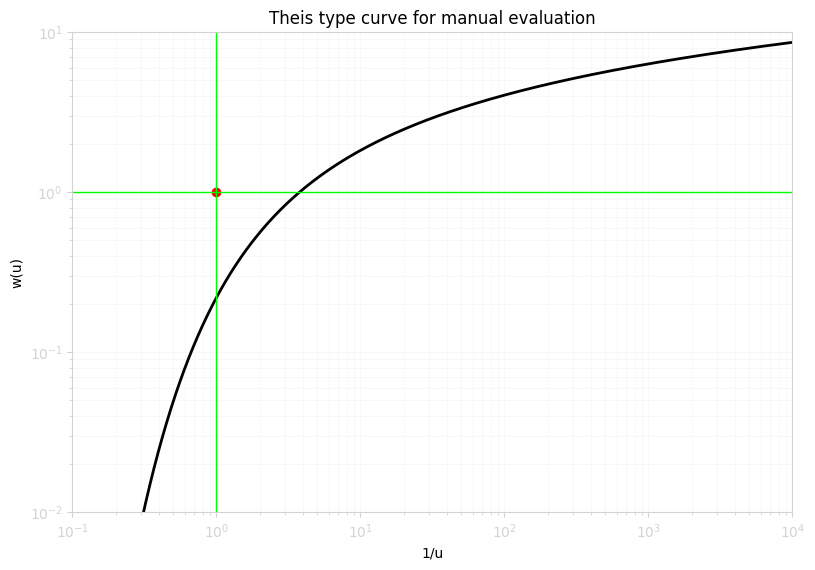

In [17]:
# W(u) is match_wu and 1/u is match_uinv
match_u_inv=1
match_wu=1
matchgrid_x=[match_u_inv, match_u_inv]
matchgrid_y=[match_wu, match_wu]
matchgrid  =[0.001, 1000000]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area

#plot the data
ax.plot(u_inv, w_u, color = 'black', linewidth = 2)
ax.plot(match_u_inv, match_wu,'ro',markersize=6)
ax.plot(matchgrid_x,matchgrid,color ='lime', linewidth = 1)
ax.plot(matchgrid,matchgrid_y,color = 'lime', linewidth = 1)

#set up the diagramm
plt.yscale("log")
plt.xscale("log")
plt.axis([0.1,1E4,1E-2,1E+1])
ax.set(xlabel='1/u', ylabel='w(u)',
       title='Theis type curve for manual evaluation')
ax.grid(which="both",color='whitesmoke', linewidth=0.5)

#box around plot
ax.spines['top'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')

ax.tick_params(which='both', colors='lightgrey')

plt.savefig(save_dir+'TYPE_CURVE.png', dpi=300)
plt.show

**Subsequently, the given data for the processing of measured data are provided.**

This are the given data like
- pumping rate $Q$,
- aquifer thickness $b$,
- distance of the observation (where time and drawdown were measured) to the pumping well $r$.

**These data can be adjusted for individual measurements.**

First, plot and save the measured data; eventually adjust the diagram scales, if appropriate (check comments below)

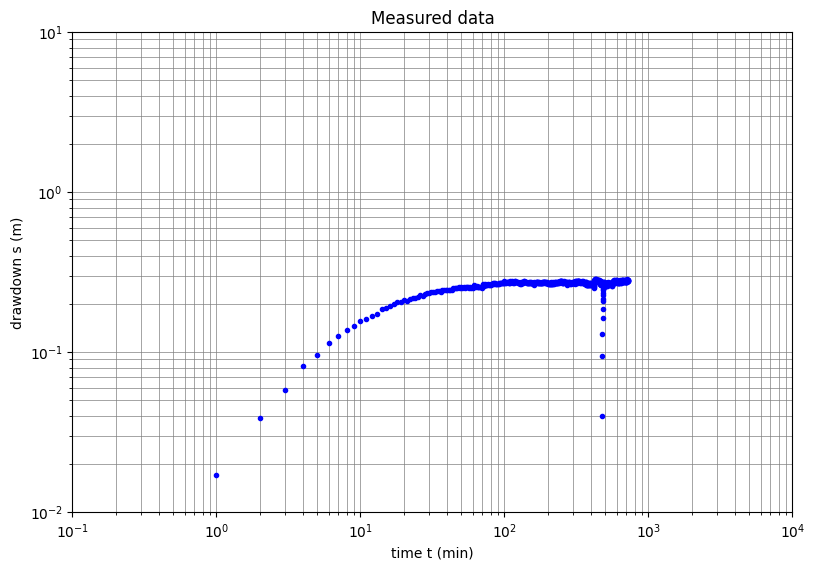

In [19]:
#Compute derivatives
x = 0
for t in m_time:
    if x > 0:
        d[x] = deriv(m_time[x], m_time[(x-1)], m_ddown[x], m_ddown[(x-1)])
    x = x+1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
ax.plot(m_time, m_ddown,'bo', markersize=3)

#uncomment to plot derivatives
#ax.plot(m_time, d,'ro', markersize=3)
plt.yscale("log")
plt.xscale("log")

#adjust scales here
plt.axis([0.1,1E4,1E-2,1E+1])
ax.set(xlabel='time t (min)', ylabel='drawdown s (m)',
       title='Measured data')
ax.grid(which="both", color='grey',linewidth=0.5)
plt.savefig(save_dir+'MEASURED.png', transparent='true', dpi=300)
plt.show()

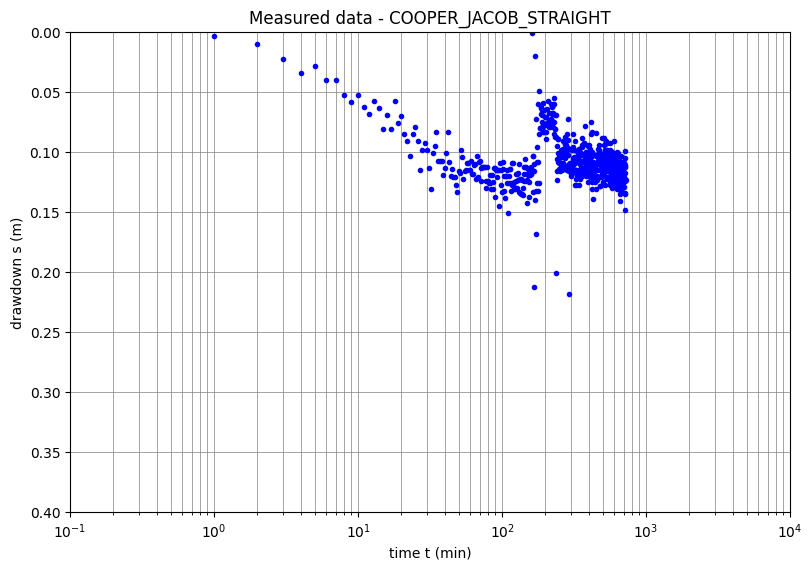

In [11]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
ax.plot(m_time, m_ddown,'bo', markersize=3)
plt.xscale("log")

#adjust scales here
plt.axis([0.1,1E4,0.4,0])
ax.set(xlabel='time t (min)', ylabel='drawdown s (m)',
       title='Measured data - COOPER_JACOB_STRAIGHT')
ax.grid(which="both", color='grey',linewidth=0.5)
plt.savefig(save_dir+'COOPER_JACOB_STRAIGHT.png', transparent='true', dpi=300)
plt.show()

## Manual fitting
- Now you should go to the previously defined folder (variable 'save_dir' in the first code-box; presetting is C:/GVG460/T07...) where the type curve and the measured data are saved;
- Print or load this figures to a suitable methode (for example in MS-Word or MS-EXCEL);
- If the matching point and the range of the axis doesnt fit your data, adjust (in the previous code boxes) and replot;
- make sure, that both figures come with the same amount of log-cycles on the x- and y-axis;
- make sure, that both figures are of same size;
- fit the type-curve and the measured-data-plot as best as possible;
- Note the t and s value, where the matchpoint from the type-curve intersects the measured-data-plot;
- this t and s values are necessary for further processing.

## Details of the computation
By fitting the type curve and the measured data and under consideration of the matching point, the values of t and s can be derived from the plots. Those parameters can be used to further compute transmissivity T and storativity S by the following equations

$$ T=\frac{Q}{4\pi s}W(u) $$

and subsequently

$$ S = \frac{4Tt}{r^2}u $$



## DATA PROCESSING & CHECK
Under consideration of the pumping test data (extraction rate Q and distance r between pumping well and observation, the formation parameter can be computed. The next section is to check the manual parameter estimation. Estimated data (T and S) are set in a common plot. If the manual estimation was successful, measured data and type curve in the automatic plot will fit.

**FIRST, DEFINE THE PARAMETERS AND THE MANUALLY ESTIMATED DATA (t / s) HERE. MAKE SURE THE UNITS ARE CONSISTENT (e.g. METERS / SECONDS)**

In [12]:
# Test data here; probably convert from feet / minutes / days etc.
r = 20
Q = 0.0115*60

# Graphically estimated parameter here
t_est = 1*60
s_est = 0.6

In [13]:
# Compute Transmissivity and Storativity
T = Q * match_wu/(4*np.pi*s_est)
S = 4*t_est*T/r**2/match_u_inv

print("Distance       r = ",'{:.2f}'.format(r), "m")
print("Pumpingrate    Q = ",'{:.2e}'.format(Q), "m3/s")
print("Transmissivity T = ",'{:.2e}'.format(T), "m2/s")
print("Storativity    S = ",'{:.2e}'.format(S), "[-]")

Distance       r =  20.00 m
Pumpingrate    Q =  6.90e-01 m3/s
Transmissivity T =  9.15e-02 m2/s
Storativity    S =  5.49e-02 [-]


**Plot the match between type curve and measured data to check the manual estimation**


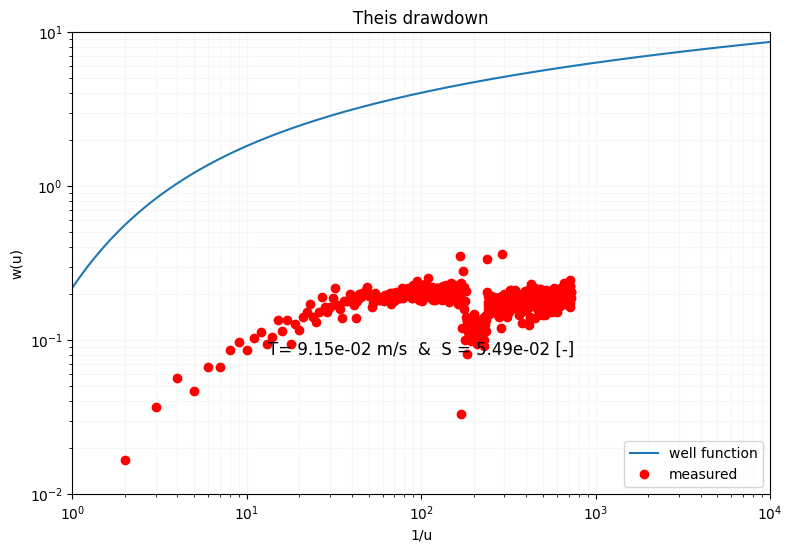

In [14]:
#GENERATE THE TYPE CURVE AND PLOT THE MEASURED DATA
x = 0
for t in m_time:
    um[x] = theis_u(T,S,r,t*60)
    um_inv[x] = 1/um[x]
    w_um[x] = theis_wu(Q,T,m_ddown[x])
    x = x+1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(u_inv, w_u)
ax.plot(um_inv, w_um,'ro')
plt.yscale("log")
plt.xscale("log")
plt.axis([1,1E4,1E-2,1E+1])
plot_text = "T= " + str('{:.2e}'.format(T))+ " m/s  &  S = " + str('{:.2e}'.format(S))+" [-]"
plt.text(100, 0.1,plot_text,horizontalalignment='center',verticalalignment='top',multialignment='center', size='12')
ax.set(xlabel='1/u', ylabel='w(u)',title='Theis drawdown')
ax.grid(which="both",color='whitesmoke')
plt.legend(('well function','measured'), loc=4)
plt.savefig(save_dir+'CHECK_THEIS_MANUAL.png', dpi=300)
plt.show()